# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


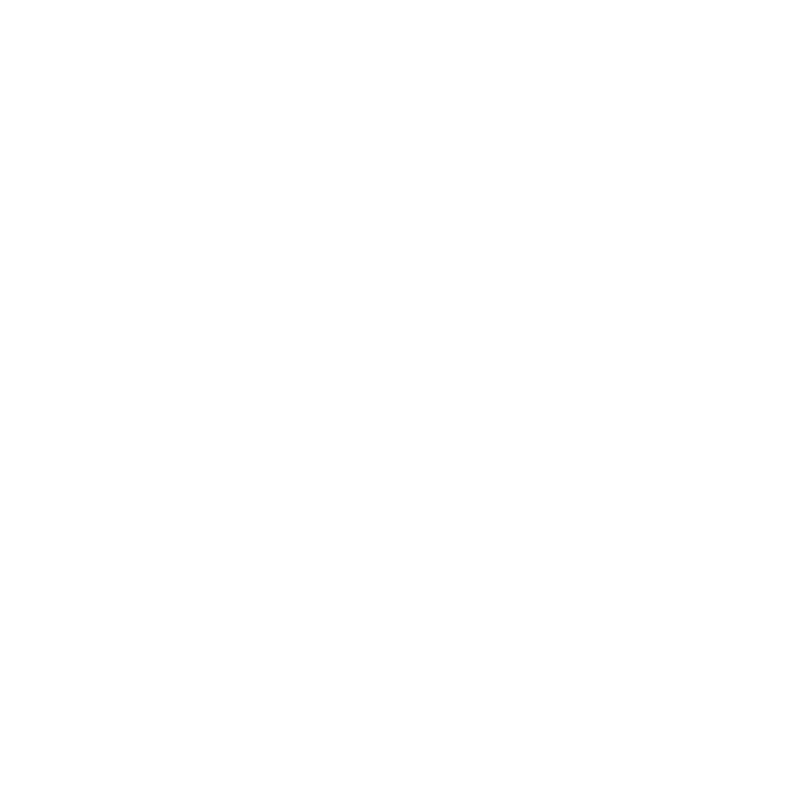

In [224]:
%matplotlib notebook

import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')
    

<IPython.core.display.Javascript object>


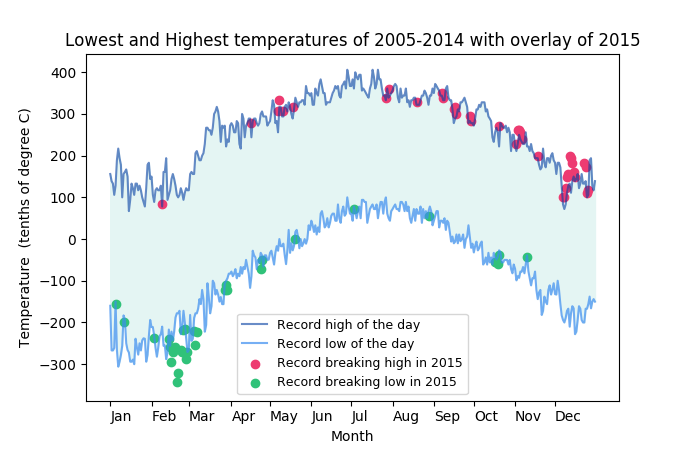

In [221]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#Converting to datetime
df['Date'] = pd.to_datetime(df['Date'])

#Seprating Years 2005-2014
start_date = '2005-01-01'
end_date = '2014-12-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
dfall = df.loc[mask]

#Seprating Year 2015
start_date = '2015-01-01'
end_date = '2015-12-31'
mask = ((df['Date']>=start_date) & (df['Date']<=end_date))
df1 = df.loc[mask]

#Removing leap days from both dataframes
dfall = dfall[~((dfall.Date.dt.month == 2) & (dfall.Date.dt.day == 29))]
df1 = df1[~((df1.Date.dt.month == 2) & (df1.Date.dt.day == 29))]

#Sorting dates of both dataframes
df1.sort_values('Date')
dfall.sort_values('Date')

#Grouping according to month,day and extracting max and min value from dfall
max_temp = dfall.groupby([(dfall.Date.dt.month),(dfall.Date.dt.day)])['Data_Value'].max()
min_temp = dfall.groupby([(dfall.Date.dt.month),(dfall.Date.dt.day)])['Data_Value'].min()

#Grouping according to month,day and extracting max and min value from df1
max_temp2015 = df1.groupby([(df1.Date.dt.month),(df1.Date.dt.day)])['Data_Value'].max()
min_temp2015 = df1.groupby([(df1.Date.dt.month),(df1.Date.dt.day)])['Data_Value'].min()

#Generating list from Series
maxlist = []
for index,value in max_temp.iteritems():
    maxlist.append(value)
    
minlist = []
for index,value in min_temp.iteritems():
    minlist.append(value)
    
maxlist2015 = []
for index,value in max_temp2015.iteritems():
    maxlist2015.append(value)
    
minlist2015 = []
for index,value in min_temp2015.iteritems():
    minlist2015.append(value)

#Plotting maxlist,minlist and formatting the graph
plt.figure()

plt.plot(maxlist,label = 'Record high of the day',color='#053fa3',alpha=0.6)
plt.plot(minlist,label = 'Record low of the day',color='#3c8df0',alpha=0.7)

#Updating xticks according to the required condition
position = np.array([0,31,59,91,120,151,181,212,243,273,304,334])
label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(position,label,horizontalalignment='left')

#Shading between the two lines
plt.fill_between(list(range(0,365)),maxlist,minlist,color='#e4f5f3')

#generating Series with index as days(0-365)
maxseries = pd.Series(maxlist,index=list(range(0,365)))
minseries = pd.Series(minlist,index=list(range(0,365)))
maxseries2015 = pd.Series(maxlist2015,index=list(range(0,365)))
minseries2015 = pd.Series(minlist2015,index=list(range(0,365)))

#Generating a dataframe from all series for easy comparison
dfcompare = pd.DataFrame({"max":maxseries, "min":minseries, "max2015":maxseries2015, "min2015":minseries2015})

#Masking according to condition
dfcompare['MaxBoolean'] = dfcompare['max2015']>dfcompare['max']
dfcompare['MinBoolean'] = dfcompare['min2015']<dfcompare['min']

#Getting Record high and Record low temperature and day for 2015
maxindex = dfcompare.index[dfcompare['MaxBoolean']==True]
minindex = dfcompare.index[dfcompare['MinBoolean']==True]

maxvalue = dfcompare['max2015'][dfcompare['MaxBoolean']==True]
minvalue = dfcompare['min2015'][dfcompare['MinBoolean']==True]

#Generating scatter plot for Record High and Record Low
plt.scatter(maxindex,maxvalue,color='#ed3b71',label='Record breaking high in 2015')
plt.scatter(minindex,minvalue,color='#30c279',label='Record breaking low in 2015')

#Adding title,xlabel,ylabel and legend
plt.title('Lowest and Highest temperatures of 2005-2014 with overlay of 2015')
plt.xlabel('Month')
plt.ylabel('Temperature  (tenths of degree C)')
plt.legend(prop={'size':9},loc='lower center')

